In [1]:
import ADerrors as AD
import HDF5
import Plots
import Statistics as Stats
using LaTeXStrings
import CorrelatorAnalysis as CA

In [2]:
# read Jeremys correlator
file_path = "/home/stumpa/Seafile/Dokumente/HU_Berlin,DESY/Programs/wit_-_MainzLattice/PerambulatorContractions/run_pseudoscalar_juwels_tmp2/program_files/results/p1,0,0/B450r000_32modes_pseudoscalar.hdf5"
file = HDF5.h5open(file_path)
corr = read(file["Correlator"])     # "ps"
close(file)
Nₜ, N_src, N_cnfg = size(corr)

(64, 8, 1612)

## Non-folded correlator

Initialize correlator and set lattice constant

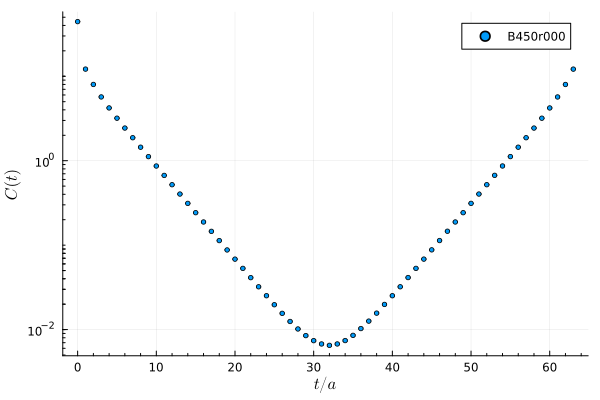

In [5]:
# Correlator
mcid = "B450r000"

# Lattice spacing: a = 0.0762 fm
a = AD.uwreal([0.0762, 0], "a")/CA.ħc  # 1/MeV
unit = "MeV"

corr_src_mean = Stats.mean(real(corr), dims=2)[:, 1, :]
Cₜ = CA.uwreal_array(corr_src_mean, mcid, :auto)

p = CA.plot_correlator(Cₜ)
display(p)

Autocorrelation at time 9

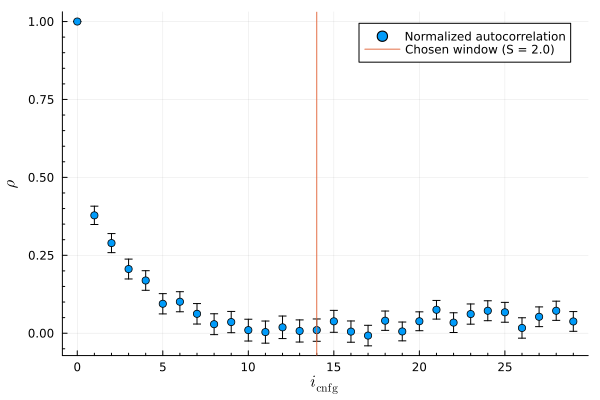

In [4]:
CA.plot_autocorrelation(Cₜ[10], mcid, markersize=4)

Effective mass

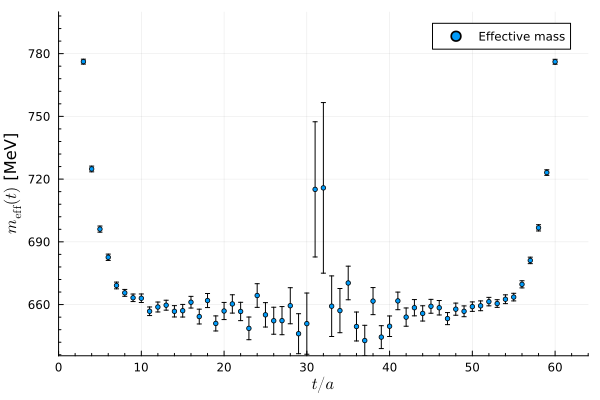

In [5]:
am_eff = CA.effective_mass(Cₜ, :cosh)

p = Plots.plot(xlim=[0, 64], ylim=[:auto, 800])
CA.plot_effective_mass!(am_eff/a, unit=unit)
display(p)

Constant fit to effective mass plateau

In [6]:
# Plateau range (lattice units)
plateau_range = [11, 51]

am = CA.fit_plateau(am_eff, plateau_range)

m = CA.err!(am/a)

657.3138400277402 +/- 1.5780809793144068

Plot effective mass of correlator with fit to plateau

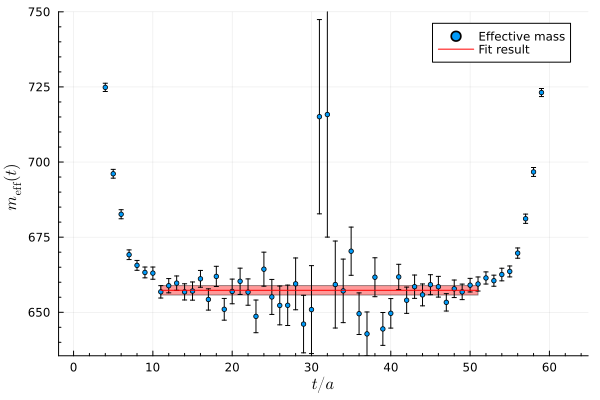

In [7]:
# Plot effective mass with fit to plateau
p = Plots.plot(ylim=[:auto, 750])
CA.plot_effective_mass!(am_eff/a)
CA.plot_error_rectangle!(m, plateau_range, unit=unit)
display(p)

Fit to correlator

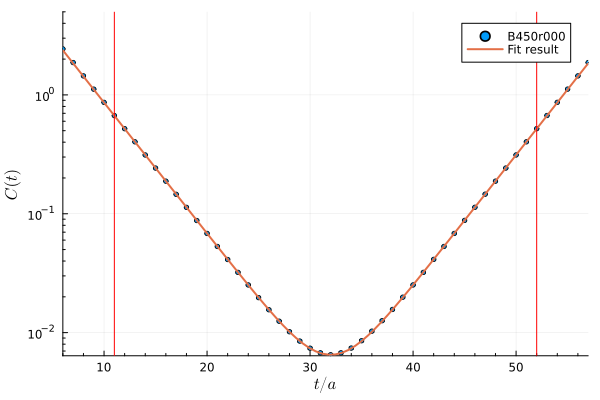

656.5952337578769 +/- 1.6734785131400542

In [8]:
corr_model(t, p) = @. p[1]*cosh(p[2]*(t - Nₜ/2))
fit_range = [plateau_range[1], plateau_range[2]+1]
xdata = range(fit_range...)
ydata = Cₜ[xdata.+1]

p0 = [7e-3, 0.25]
#= p = Plots.plot(title="Initial guess")
CA.plot_correlator!(Cₜ)
CA.plot_model!(corr_model, [0, Nₜ-1], p0)
display(p) =#

(A, am_fit), cexp = CA.fit(corr_model, xdata, ydata, p0)


p = Plots.plot(xlims=[6, 57], ylims=[:auto, 5])
CA.plot_correlator!(Cₜ)
CA.plot_model!(corr_model, [0, Nₜ-1], AD.value.([A, am_fit]))
Plots.vline!(fit_range, label=nothing, color=:red)
display(p)

CA.err!(am_fit/a)

## Folded correlator

Folded correlator

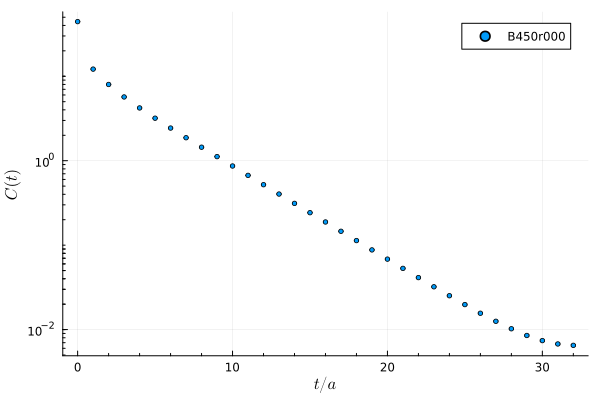

In [9]:
Cₜ_folded = CA.fold_correlator(Cₜ)

p = CA.plot_correlator(Cₜ_folded)
display(p)

Effective mass of folded correlator

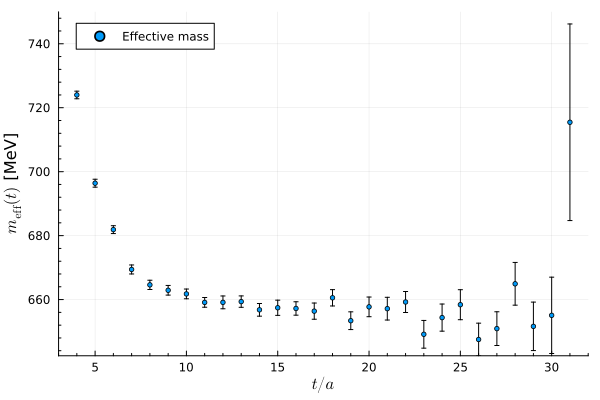

In [10]:
am_eff_folded = CA.effective_mass(Cₜ_folded, :cosh, folded=true)
CA.err!.(am_eff_folded)

p = Plots.plot(xlim=[3, :auto], ylim=[:auto, 750])
CA.plot_effective_mass!(am_eff_folded/a, unit=unit)
display(p)

Constant fit to effective mass plateau

In [11]:
# Plateau range (lattice units)
plateau_range_folded = [11, 28]

am_folded = CA.fit_plateau(am_eff_folded, plateau_range_folded)

m_folded = CA.err!(am_folded/a)

657.6202561282212 +/- 1.5212855009840285

Plot effective mass of folded correlator with fit to plateau

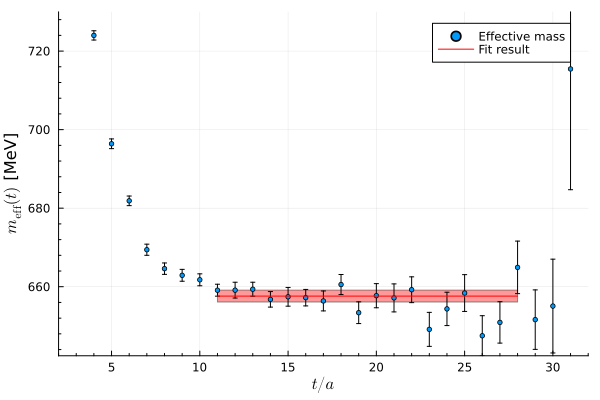

In [12]:
# Plot effective mass of folded correlator with fit to plateau
p = Plots.plot(xlim=[2, :auto], ylim=[:auto, 730])
CA.plot_effective_mass!(am_eff_folded/a, unit=unit)
CA.plot_error_rectangle!(m_folded, plateau_range_folded)
display(p)

Fit to correlator

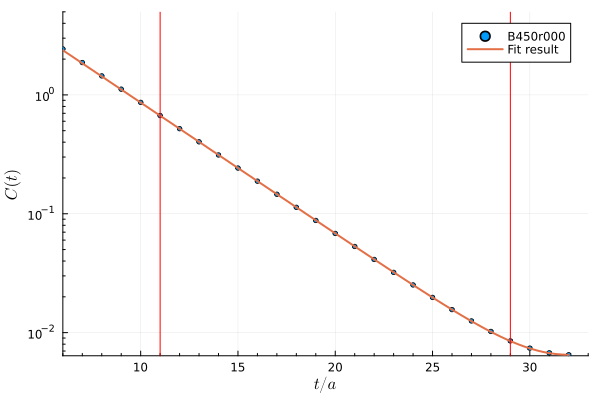

656.8686619785077 +/- 1.5926570085408367

In [13]:
fit_range_folded = [plateau_range_folded[1], plateau_range_folded[2]+1]
xdata = range(fit_range_folded...)
ydata = Cₜ_folded[xdata.+1]

p0 = [7e-3, 0.25]
#= p = Plots.plot()
CA.plot_correlator!(Cₜ_folded)
CA.plot_model!(corr_model, [0, Nₜ÷2], p0)
display(p) =#

(A_folded, am_folded_fit), cexp = CA.fit(corr_model, xdata, ydata, p0)

p = Plots.plot(xlims=[6, 33], ylims=[:auto, 5])
CA.plot_correlator!(Cₜ_folded)
CA.plot_model!(corr_model, [0, Nₜ÷2], AD.value.([A, am_fit]))
Plots.vline!(fit_range_folded, label=nothing, color=:red)
display(p)

CA.err!(am_folded_fit/a)

In [14]:
CA.err!(A_folded)

0.006503071705487689 +/- 0.0001060639274430725